In [ ]:
# requirements and imports
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from scipy import sparse
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs


: 

0.0

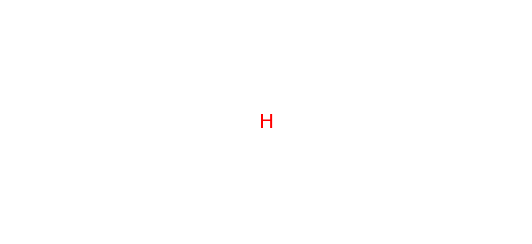